In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

## model 1AS1 crashes in 2042, starts having nans

1AW1, 1AC1 can't get past 2052

potential easy fix:
    STOP not enough years in atmc14.dat, also atmb14 or somesuch:
    Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
    IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

1AS1 - 
goes nan in index-month 9 in 2042

In [5]:
bD = '/gpfs/afm/greenocean/software/runs/TOM12_TJ_1AS3/'
ty = 2041
tf = f'ORCA2_1m_{ty}0101_{ty}1231_grid_T.nc'

ds = xr.open_dataset(f'{bD}{tf}')
w = ds.vosaline.values
print(np.isnan(w).any())

ty = 2042
tf = f'ORCA2_1m_{ty}0101_{ty}1231_grid_T.nc'

ds = xr.open_dataset(f'{bD}{tf}')
w = ds.vosaline.values
print(np.isnan(w).any())

False
False


In [3]:
ty = 2042

bD = '/gpfs/afm/greenocean/software/runs/TOM12_TJ_1AS3/'
tf = f'ORCA2_1m_{ty}0101_{ty}1231_grid_T.nc'
ds = xr.open_dataset(f'{bD}{tf}')
salt = ds.vosaline.values

for i in range(0,12):
    print(f'{i}, {np.isnan(salt[i,:,:,:]).any()}')
    tsalt = salt[i,:,:,:]
    where_real = (np.where(tsalt>0))
    smolsalt = tsalt[where_real]
    print(f'realnos {len(smolsalt)}')
    
    where_0 = np.where(tsalt == 0)
    zerosalt = tsalt[where_0]
    print(f'0s {len(zerosalt)}')
    
    where_nan = np.where(np.isnan(tsalt))
    nansalt = tsalt[where_nan]
    print(f'nans {len(nansalt)}')
    
    print(len(zerosalt)+len(smolsalt)+len(nansalt))

0, False
realnos 435673
0s 404985
nans 0
840658
1, False
realnos 435673
0s 404985
nans 0
840658
2, False
realnos 435673
0s 404985
nans 0
840658
3, False
realnos 435673
0s 404985
nans 0
840658
4, False
realnos 435673
0s 404985
nans 0
840658
5, False
realnos 435673
0s 404985
nans 0
840658
6, False
realnos 435673
0s 404985
nans 0
840658
7, False
realnos 435673
0s 404985
nans 0
840658
8, False
realnos 435673
0s 404985
nans 0
840658
9, False
realnos 435673
0s 404985
nans 0
840658
10, False
realnos 435673
0s 404985
nans 0
840658
11, False
realnos 435673
0s 404985
nans 0
840658


In [6]:
bD = '/gpfs/afm/greenocean/software/runs/TOM12_TJ_1AS1/'
tf = f'ORCA2_1m_{ty}0101_{ty}1231_ptrc_T.nc'
ds = xr.open_dataset(f'{bD}{tf}')


<class 'numpy.ndarray'>


In [48]:
q = (np.where((Fer[9,:,:,:] > 0) & (Fer[9,:,:,:] < 6.5e-10)))
print(np.shape(q))
q = np.asarray(q)
print(np.min(q[0,:]))

(3, 24028)
30


In [54]:
Fer = (ds.Fer.values)
DIC = (ds.DIC.values)
print(type(Fer))
print(np.shape(Fer))
for i in range(0,12):
    #print(f'{np.nanmin(Fer[i,:,:,:])},{np.nanmax(Fer[i,:,:,:])}')
    print(f'{np.nansum(Fer[i,0:30,:,:])}')


<class 'numpy.ndarray'>
(12, 31, 149, 182)
0.0001661540736677125
0.0001666260650381446
0.00016696284001227468
0.00016671726189088076
0.00016643486742395908
0.00016623464762233198
0.0001662769354879856
0.00016619089001324028
0.0001668839977355674
0.0
0.0
0.0


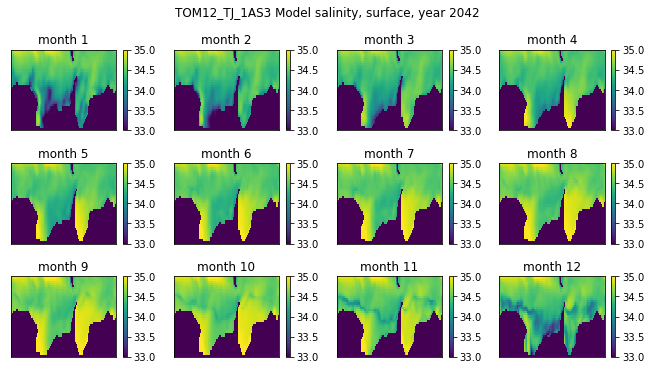

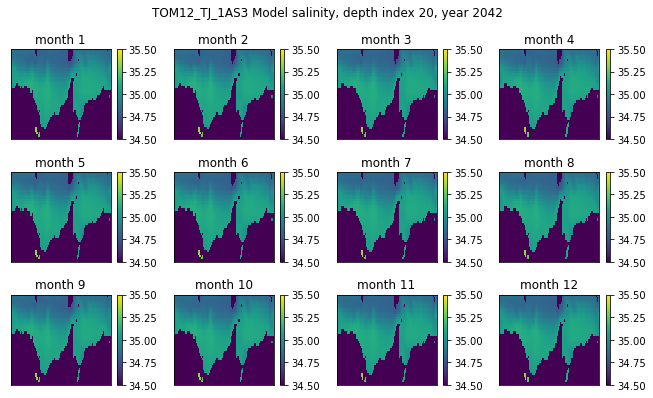

In [6]:
bD = '/gpfs/afm/greenocean/software/runs/TOM12_TJ_1AS3/'
tf = f'ORCA2_1m_{ty}0101_{ty}1231_grid_T.nc'
ds = xr.open_dataset(f'{bD}{tf}')
vos = ds.vosaline.values
fact = 0.4
fig, axs = plt.subplots(3,4, figsize=(23*fact, 13*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    td = 0
    w = axs[i].pcolormesh(vos[i,td,0:37,:], vmin = 33, vmax = 35)
    plt.colorbar(w, ax = axs[i])
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xticks([]); axs[i].set_yticks([]); 
fig.suptitle('TOM12_TJ_1AS3 Model salinity, surface, year 2042')
plt.tight_layout()

fig, axs = plt.subplots(3,4, figsize=(23*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    td = 20
    w = axs[i].pcolormesh(vos[i,td,0:37,:], vmin = 34.5, vmax = 35.5)
    plt.colorbar(w, ax = axs[i])
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xticks([]); axs[i].set_yticks([]); 
fig.suptitle('TOM12_TJ_1AS3 Model salinity, depth index 20, year 2042')
plt.tight_layout()

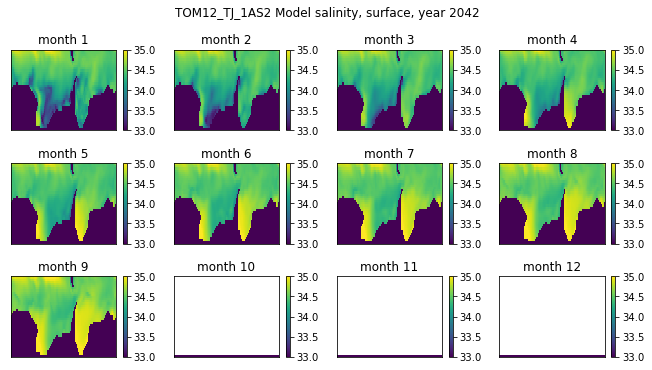

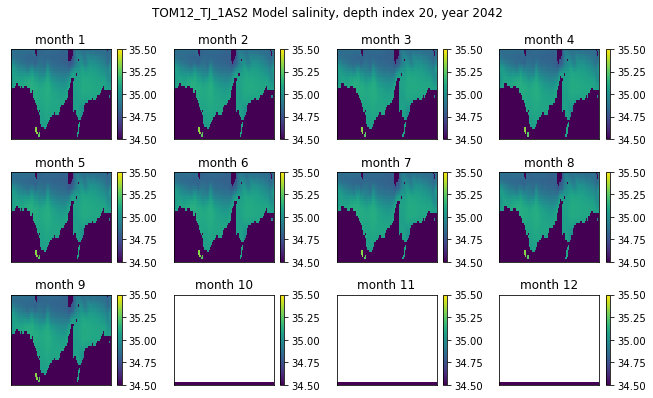

In [81]:
bD = '/gpfs/afm/greenocean/software/runs/TOM12_TJ_1AS1/'
tf = f'ORCA2_1m_{ty}0101_{ty}1231_grid_T.nc'
ds = xr.open_dataset(f'{bD}{tf}')
vos = ds.vosaline.values
fact = 0.4
fig, axs = plt.subplots(3,4, figsize=(23*fact, 13*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    td = 0
    w = axs[i].pcolormesh(vos[i,td,0:37,:], vmin = 33, vmax = 35)
    plt.colorbar(w, ax = axs[i])
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xticks([]); axs[i].set_yticks([]); 
fig.suptitle('TOM12_TJ_1AS2 Model salinity, surface, year 2042')
plt.tight_layout()

fig, axs = plt.subplots(3,4, figsize=(23*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    td = 20
    w = axs[i].pcolormesh(vos[i,td,0:37,:], vmin = 34.5, vmax = 35.5)
    plt.colorbar(w, ax = axs[i])
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xticks([]); axs[i].set_yticks([]); 
fig.suptitle('TOM12_TJ_1AS2 Model salinity, depth index 20, year 2042')
plt.tight_layout()

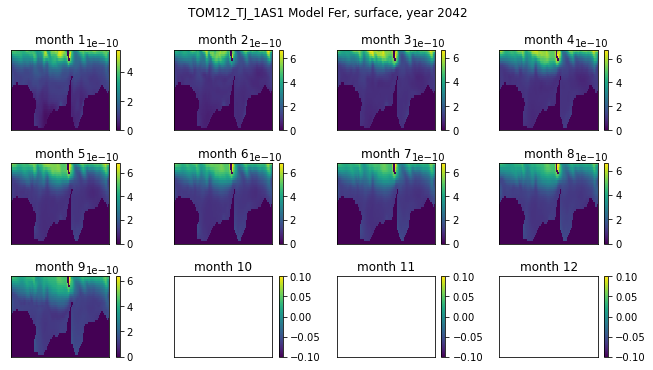

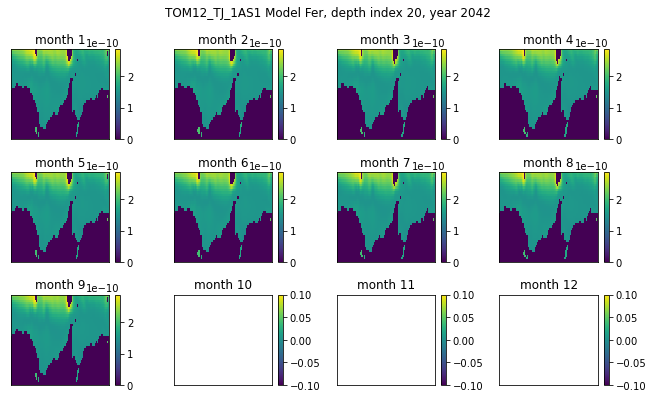

In [86]:
bD = '/gpfs/afm/greenocean/software/runs/TOM12_TJ_1AS1/'
tf = f'ORCA2_1m_{ty}0101_{ty}1231_ptrc_T.nc'
ds = xr.open_dataset(f'{bD}{tf}')
vos = ds.Fer.values
fact = 0.4
fig, axs = plt.subplots(3,4, figsize=(23*fact, 13*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    td = 0
    w = axs[i].pcolormesh(vos[i,td,0:37,:])
    plt.colorbar(w, ax = axs[i])
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xticks([]); axs[i].set_yticks([]); 
fig.suptitle('TOM12_TJ_1AS1 Model Fer, surface, year 2042')
plt.tight_layout()

fig, axs = plt.subplots(3,4, figsize=(23*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    td = 20
    w = axs[i].pcolormesh(vos[i,td,0:37,:])
    plt.colorbar(w, ax = axs[i])
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xticks([]); axs[i].set_yticks([]); 
fig.suptitle('TOM12_TJ_1AS1 Model Fer, depth index 20, year 2042')
plt.tight_layout()

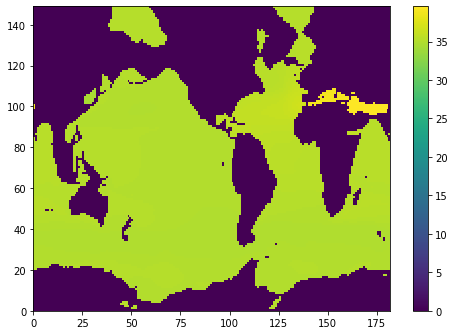

In [60]:
bD = '/gpfs/afm/greenocean/software/runs/TOM12_TJ_1AS2/'
tf = f'ORCA2_1m_{ty}0101_{ty}1231_grid_T.nc'
ds = xr.open_dataset(f'{bD}{tf}')
vos = ds.vosaline.values
fact = 0.4
fig, axs = plt.subplots(1,1, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()
tm = 11; td = 20
w = axs.pcolormesh(vos[tm,td,:,:])
plt.colorbar(w)

## instability occurs in index 9 in 1AS1

In [ ]:
ty = 2042

bD = '/gpfs/afm/greenocean/software/runs/TOM12_TJ_1AS1/'
tf = f'ORCA2_1m_{ty}0101_{ty}1231_grid_T.nc'
ds = xr.open_dataset(f'{bD}{tf}')
salt = ds.vosaline.values

for i in range(0,12):
    print(f'{i}, {np.isnan(salt[i,:,:,:]).any()}')
    tsalt = salt[i,:,:,:]
    where_real = (np.where(tsalt>0))
    smolsalt = tsalt[where_real]
    print(f'realnos {len(smolsalt)}')
    
    where_0 = np.where(tsalt == 0)
    zerosalt = tsalt[where_0]
    print(f'0s {len(zerosalt)}')
    
    where_nan = np.where(np.isnan(tsalt))
    nansalt = tsalt[where_nan]
    print(f'nans {len(nansalt)}')
    
    print(len(zerosalt)+len(smolsalt)+len(nansalt))

In [43]:
import netCDF4 as nc

ptd = '/gpfs/home/mep22dku/scratch/MET_soft/ssp126/u-be682_ssp126//'
tvars = ['air', 'shum','rsds','rlds','prra','prsn','shum'] 
for i in range(16,22):
    no = i; var =tvars[i-16]
    print(var)
    bulk16_40 = nc.Dataset(f'{ptd}bulk_2040_{no}_met_daily.nc')
    print(bulk16_40)
    tair_40 = bulk16_40[var][:]
    bulk16_41 = nc.Dataset(f'{ptd}bulk_2041_{no}_met_daily.nc')
    tair_41 = bulk16_41[var][:]
    bulk16_42 = nc.Dataset(f'{ptd}bulk_2042_{no}_met_daily.nc')
    tair_42 = bulk16_42[var][:]
    print(f'min 2041-2040 {np.nanmin(tair_41-tair_40)}')
    print(f'max 2041-2040 {np.nanmax(tair_41-tair_40)}')
    print(f'mean 2041-2040 {np.nanmean(tair_41-tair_40)}')
    print('diffs') 
    print(f'min 2042-2041 {np.nanmin(tair_42-tair_41)}')
    print(f'max 2042-2041 {np.nanmax(tair_42-tair_41)}')
    print(f'mean 2042-2041 {np.nanmean(tair_42-tair_41)}')
    print()



air
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): x(182), y(149), deptht(1), time_counter(365)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 deptht(y,x), float32 time_counter(time_counter), float32 air(time_counter,y,x)
    groups: 
min 2041-2040 -44.83927917480469
max 2041-2040 56.63215637207031
mean 2041-2040 0.05283832922577858
diffs
min 2042-2041 -45.16407775878906
max 2042-2041 48.12474060058594
mean 2042-2041 0.03542693704366684

shum
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): x(182), y(149), deptht(1), time_counter(365)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 deptht(y,x), float32 time_counter(time_counter), float32 shum(time_counter,y,x)
    groups: 
min 2041-2040 -0.017507942393422127
max 2041-2040 0.017927110195159912
mean 2041-2040 7.834934876882471e-06
diffs
min

In [46]:
ptd = '/gpfs/home/mep22dku/scratch/MET_soft/ssp126/u-be682_ssp126//'


bulk16_40 = nc.Dataset(f'{ptd}taux_1d_2040_daily.nc')
tair_40 = bulk16_40['uflx'][:]
bulk16_41 = nc.Dataset(f'{ptd}taux_1d_2041_daily.nc')
tair_41 = bulk16_41['uflx'][:]
bulk16_42 = nc.Dataset(f'{ptd}taux_1d_2042_daily.nc')
tair_42 = bulk16_42['uflx'][:]

print(f'min 2041-2040 {np.nanmin(tair_41-tair_40)}')
print(f'max 2041-2040 {np.nanmax(tair_41-tair_40)}')
print(f'mean 2041-2040 {np.nanmean(tair_41-tair_40)}')
print('diffs') 
print(f'min 2042-2041 {np.nanmin(tair_42-tair_41)}')
print(f'max 2042-2041 {np.nanmax(tair_42-tair_41)}')
print(f'mean 2042-2041 {np.nanmean(tair_42-tair_41)}')

print('nope')
bulk16_40 = nc.Dataset(f'{ptd}tauy_1d_2040_daily.nc')
tair_40 = bulk16_40['vflx'][:]
bulk16_41 = nc.Dataset(f'{ptd}tauy_1d_2041_daily.nc')
tair_41 = bulk16_41['vflx'][:]
bulk16_42 = nc.Dataset(f'{ptd}tauy_1d_2042_daily.nc')
tair_42 = bulk16_42['vflx'][:]

print(f'min 2041-2040 {np.nanmin(tair_41-tair_40)}')
print(f'max 2041-2040 {np.nanmax(tair_41-tair_40)}')
print(f'mean 2041-2040 {np.nanmean(tair_41-tair_40)}')
print('diffs') 
print(f'min 2042-2041 {np.nanmin(tair_42-tair_41)}')
print(f'max 2042-2041 {np.nanmax(tair_42-tair_41)}')
print(f'mean 2042-2041 {np.nanmean(tair_42-tair_41)}')

min 2041-2040 -38.3066520690918
max 2041-2040 37.94780731201172
mean 2041-2040 -0.07969003915786743
diffs
min 2042-2041 -37.11810302734375
max 2042-2041 37.90639877319336
mean 2042-2041 0.03093620203435421
nope
min 2041-2040 -36.904537200927734
max 2041-2040 33.14867401123047
mean 2041-2040 0.057205431163311005
diffs
min 2042-2041 -33.6413688659668
max 2042-2041 37.39291763305664
mean 2042-2041 -0.033578407019376755


## atmc and atmb

Text(0.5, 1.0, 'atmb14')

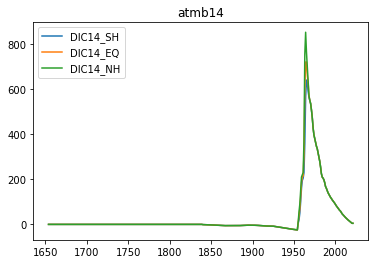

In [51]:
#/gpfs/data/greenocean/software/resources/ModelResources/C14/
w = pd.read_csv('./atmb14_mod.dat')
w.head()
plt.figure()
plt.plot(w['YEAR'],w['D14C_SH'], label = 'DIC14_SH')
plt.plot(w['YEAR'],w['D14C_EQ'], label = 'DIC14_EQ')
plt.plot(w['YEAR'],w['D14C_NH'], label = 'DIC14_NH')
plt.legend()
plt.title('atmb14')


In [ ]:
w2 = pd.read_csv('./atmc14_mod.dat')
w.head()
plt.figure()
plt.plot(w2['YEAR'],w2['D14C_SH'], label = 'DIC14_SH')
plt.plot(w2['YEAR'],w2['D14C_EQ'], label = 'DIC14_EQ')
plt.plot(w2['YEAR'],w2['D14C_NH'], label = 'DIC14_NH')
plt.legend()
plt.title('atmc14')

## to extend atmb14 beyond 2020 we need to get an exponential fit to the above data, say 1980 onwards? after 1980 it seems to be all the same...

In [46]:
yr = w['YEAR'][316:400].values 
D14C_SH = w['D14C_SH'][316:400].values#,w['D14C_SH']

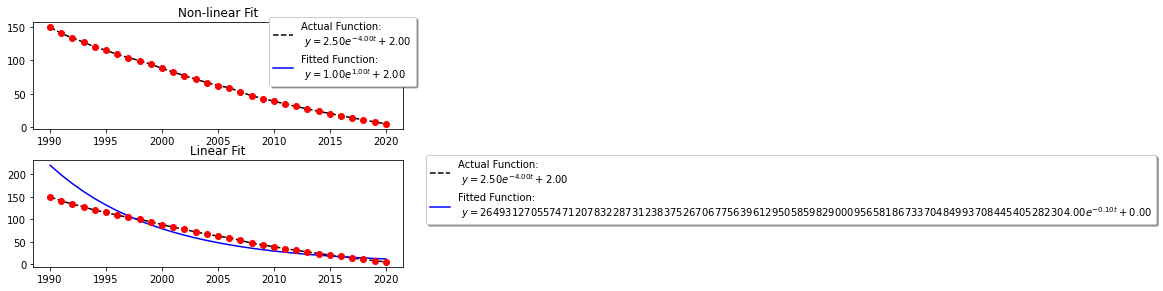

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize


def main():
    # Actual parameters
    A0, K0, C0 = 2.5, -4.0, 2.0

    # Generate some data based on these
    tmin, tmax = 0, 0.5
    num = 20
    yr = w['YEAR'][336:400].values 
    D14C_SH = w['D14C_SH'][336:400].values#,w['D14C_SH']
    t = yr
    y = D14C_SH

    # Add noise
    noisy_y = y

    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)

    # Non-linear Fit
    A, K, C = fit_exp_nonlinear(t, noisy_y)
    fit_y = model_func(t, A, K, C)
    plot(ax1, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, C0))
    ax1.set_title('Non-linear Fit')

    # Linear Fit (Note that we have to provide the y-offset ("C") value!!
    A, K = fit_exp_linear(t, y, C0)
    fit_y = model_func(t, A, K, C0)
    plot(ax2, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, 0))
    ax2.set_title('Linear Fit')

    plt.show()

def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C

def plot(ax, t, y, noisy_y, fit_y, orig_parms, fit_parms):
    A0, K0, C0 = orig_parms
    A, K, C = fit_parms

    ax.plot(t, y, 'k--', 
      label='Actual Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A0, K0, C0))
    ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))
    ax.plot(t, noisy_y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)
    plt.tight_layout()
if __name__ == '__main__':
    main()

In [49]:
t = 2010
2.5*np.exp(-4*t)+2

2.0

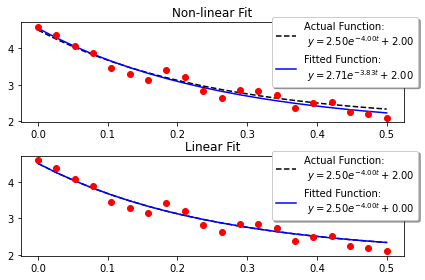

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize


def main():
    # Actual parameters
    A0, K0, C0 = 2.5, -4.0, 2.0

    # Generate some data based on these
    tmin, tmax = 0, 0.5
    num = 20
    t = np.linspace(tmin, tmax, num)
    y = model_func(t, A0, K0, C0)

    # Add noise
    noisy_y = y + 0.5 * (np.random.random(num) - 0.5)

    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)

    # Non-linear Fit
    A, K, C = fit_exp_nonlinear(t, noisy_y)
    fit_y = model_func(t, A, K, C)
    plot(ax1, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, C0))
    ax1.set_title('Non-linear Fit')

    # Linear Fit (Note that we have to provide the y-offset ("C") value!!
    A, K = fit_exp_linear(t, y, C0)
    fit_y = model_func(t, A, K, C0)
    plot(ax2, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, 0))
    ax2.set_title('Linear Fit')

    plt.show()

def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C

def plot(ax, t, y, noisy_y, fit_y, orig_parms, fit_parms):
    A0, K0, C0 = orig_parms
    A, K, C = fit_parms

    ax.plot(t, y, 'k--', 
      label='Actual Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A0, K0, C0))
    ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))
    ax.plot(t, noisy_y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)
    plt.tight_layout()
if __name__ == '__main__':
    main()

In [29]:
w.head()

,YEAR,D14C_SH,D14C_EQ,D14C_NH
0,1654,0.0,0.0,0.0
1,1655,0.0,0.0,0.0
2,1656,0.0,0.0,0.0
3,1657,0.0,0.0,0.0
4,1658,0.0,0.0,0.0
